Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


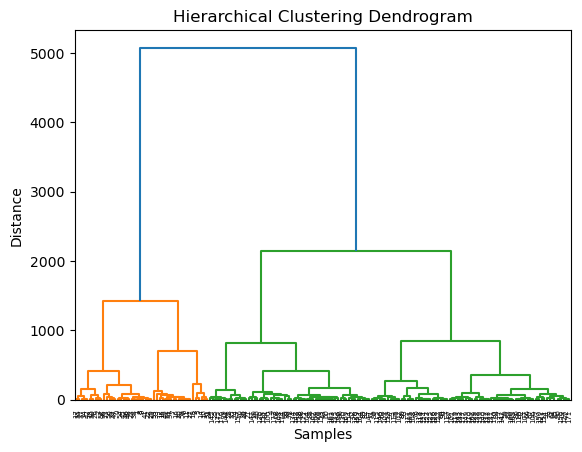

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

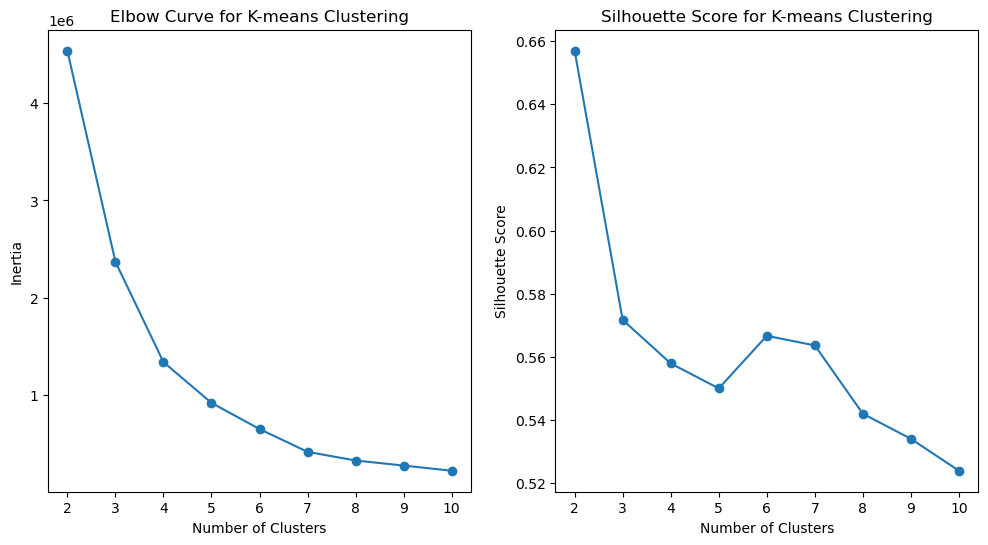

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     Original  K-means
0           1        1
1           1        1
2           1        1
3           1        1
4           1        2
..        ...      ...
173         3        2
174         3        2
175         3        2
176         3        2
177         3        0

[178 rows x 2 columns]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


df = pd.read_csv('wine.csv')

# Extracting the relevant columns
columns_of_interest = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids',
                        'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
df = df[columns_of_interest]

df_no_type = df.drop('Type', axis=1)

# PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_no_type)

# Hierarchical Clustering
linkage_matrix = linkage(principal_components, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# K-means clustering with elbow method
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principal_components, kmeans.labels_))

# Plotting the elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Curve for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plottng silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

#choosing the optimal number of clusters for K-means
optimal_k = 3 
# K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(principal_components)

# Compainge the clusters obtained with the original data
original_clusters = df['Type']
comparison_df = pd.DataFrame({'Original': original_clusters, 'K-means': kmeans_optimal.labels_})
print(comparison_df)
